<a href="https://colab.research.google.com/github/BiszakAletta/FAKT.ML.kurzus/blob/main/negyedikhazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [25]:


drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Machine learning FAKT/MSFT.csv', usecols= [5])

In [ ]:
df.head()

,Adj Close
0,60.405800
1,60.125763
2,60.443130
3,60.340454
4,60.555164


In [ ]:
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps # Az adott szekvencia-darab utolsó eleme
		if end_ix > len(sequence)-1: # Ellenőrizzük nem értünk-e a teljes lista végére
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # Kimentjük a szekvencia darabot és az utolsó elemet mint eredményváltozó
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y)

In [ ]:
x, y = split_sequence(df['Adj Close'], 10)

In [ ]:
x

array([[ 60.4058  ,  60.125763,  60.44313 , ...,  60.704506,  60.555164,
         60.657837],
       [ 60.125763,  60.44313 ,  60.340454, ...,  60.555164,  60.657837,
         60.769859],
       [ 60.44313 ,  60.340454,  60.555164, ...,  60.657837,  60.769859,
         60.947216],
       ...,
       [294.589996, 297.309998, 298.790009, ..., 278.910004, 275.850006,
        288.5     ],
       [297.309998, 298.790009, 294.950012, ..., 275.850006, 288.5     ,
        285.589996],
       [298.790009, 294.950012, 300.190002, ..., 288.5     , 285.589996,
        280.070007]])

In [ ]:
y

array([ 60.769859,  60.947216,  61.11525 , ..., 285.589996, 280.070007,
       280.070007])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
normalizer = StandardScaler()
normalizer.fit(x_train)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

In [2]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense, Dropout, Conv1D, MaxPooling1D, AveragePooling1D
import keras
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [ ]:
input = Input(shape=(10,1))

x = Conv1D(filters=128, kernel_size=3, strides=1, activation='relu')(input)
#x = MaxPooling1D(pool_size=2, strides=1)(x)
x = AveragePooling1D(pool_size=2, strides=1)(x)
x = Conv1D(filters=64, kernel_size=2, activation='relu', strides=1)(x) #padding='same'
x = AveragePooling1D(pool_size=2, strides=1)(x)
#x = MaxPooling1D(pool_size=2, strides=1)(x)
#x = Conv1D(filters=32, kernel_size=2, activation='relu', strides=1)(x) #padding='same'
#x = AveragePooling1D(pool_size=2, strides=1)(x)
x = Flatten()(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.4)(x)

output = Dense(1, activation='linear')(x)

In [ ]:
model = keras.Model(input, output)

In [ ]:
model.compile(optimizer='adam',
    loss='MSE')

In [ ]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
tensorboard_callback = TensorBoard('logs/run1')

In [ ]:
model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/100
25/25 [==============================] - 7s 261ms/step - loss: 11842.9033 - val_loss: 3448.8638
Epoch 2/100
25/25 [==============================] - 8s 309ms/step - loss: 1961.4424 - val_loss: 750.4232
Epoch 3/100
25/25 [==============================] - 7s 292ms/step - loss: 224.6652 - val_loss: 74.4813
Epoch 4/100
25/25 [==============================] - 7s 296ms/step - loss: 70.6334 - val_loss: 34.6311
Epoch 5/100
25/25 [==============================] - 7s 295ms/step - loss: 48.3186 - val_loss: 31.2372
Epoch 6/100
25/25 [==============================] - 7s 285ms/step - loss: 50.7358 - val_loss: 34.9002
Epoch 7/100
25/25 [==============================] - 7s 287ms/step - loss: 50.7866 - val_loss: 39.4727
Epoch 8/100
25/25 [==============================] - 7s 270ms/step - loss: 82.5162 - val_loss: 36.3372
Epoch 9/100
25/25 [==============================] - 7s 277ms/step - loss: 57.4985 - val_loss: 38.8690
Epoch 10/100
25/25 [==============================] - 8s 303ms/s

In [ ]:
model.predict(x_test)

In [ ]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 1s 76ms/step - loss: 36.0097


36.00974655151367

In [1]:
####################################################################

In [2]:
#Órai képfelismerés

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
class_names = ['repulo', 'auto', 'madar', 'macska', 'szarvas', 'kutya', 'beka', 'lo', 'hajo', 'kamion']

In [5]:
import matplotlib.pyplot as plt

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [10]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
input = Input(shape=(32,32,3))

x = Conv2D(filters=64, kernel_size=5, strides=4, activation='relu', padding='same')(input)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=256, kernel_size=5, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Flatten()(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.4)(x)

output = Dense(len(class_names), activation='softmax')(x)

In [12]:
AlexNet = keras.Model(input, output)

In [13]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [14]:
tensorboard_callback = TensorBoard('logs/run1')

In [15]:
AlexNet.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
AlexNet.fit(x_train, y_train, epochs=100, validation_split=0.1,callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/100
1407/1407 [==============================] - 47s 26ms/step - loss: 2.3030 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 36s 26ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 3/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.0970
Epoch 4/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 5/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 6/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 7/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2

In [17]:
AlexNet.predict(x_test)

array([[0.09927109, 0.09961008, 0.10075735, ..., 0.10091153, 0.09861508,
        0.1000282 ],
       [0.09927109, 0.09961008, 0.10075735, ..., 0.10091153, 0.09861508,
        0.1000282 ],
       [0.09927109, 0.09961008, 0.10075735, ..., 0.10091153, 0.09861508,
        0.1000282 ],
       ...,
       [0.09927109, 0.09961008, 0.10075735, ..., 0.10091153, 0.09861508,
        0.1000282 ],
       [0.09927109, 0.09961008, 0.10075735, ..., 0.10091153, 0.09861508,
        0.1000282 ],
       [0.09927109, 0.09961008, 0.10075735, ..., 0.10091153, 0.09861508,
        0.1000282 ]], dtype=float32)

In [18]:
AlexNet.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302611827850342, 0.10000000149011612]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
kep1 = plt.imread('/content/drive/My Drive/Machine learning FAKT/kep1.jpg')

In [27]:
kep2 = plt.imread('/content/drive/My Drive/Machine learning FAKT/kep2.jpg')

In [28]:
kep3 = plt.imread('/content/drive/My Drive/Machine learning FAKT/kep3.jpg')

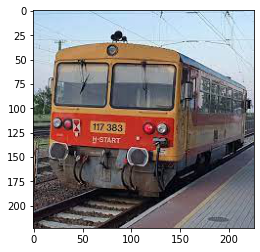

In [29]:
plt.imshow(kep1)

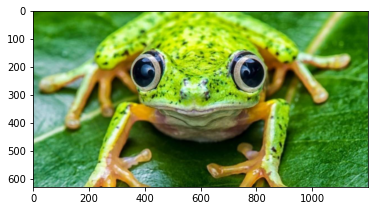

In [30]:
plt.imshow(kep2)

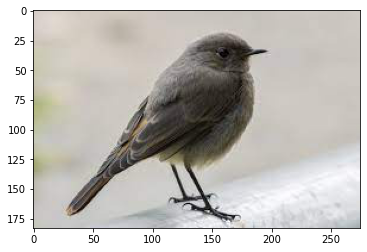

In [31]:
plt.imshow(kep3)

In [32]:
from PIL import Image

In [33]:
kep1 = Image.open('/content/drive/My Drive/Machine learning FAKT/kep1.jpg')

In [34]:
kep2 = Image.open('/content/drive/My Drive/Machine learning FAKT/kep2.jpg')

In [35]:
kep3 = Image.open('/content/drive/My Drive/Machine learning FAKT/kep3.jpg')

In [36]:
kep11 = kep1.resize(size=(32,32))

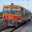

In [37]:
kep11

In [38]:
kep22 = kep2.resize(size=(32,32))

In [39]:
kep33 = kep3.resize(size=(32,32))

In [40]:
from tensorflow.keras.utils import img_to_array

In [41]:
kep111 = img_to_array(kep11)

In [42]:
kep222 = img_to_array(kep22)
kep333 = img_to_array(kep33)

In [43]:
kepek = np.array([kep111,kep222,kep333])

In [44]:
kepek.shape

(3, 32, 32, 3)

In [45]:
kepek = kepek.astype('float32') / 255

In [46]:
AlexNet.predict(kepek)

array([[0.09927109, 0.09961008, 0.10075735, 0.10076889, 0.09964691,
        0.10070656, 0.09968432, 0.10091153, 0.09861508, 0.1000282 ],
       [0.09927109, 0.09961008, 0.10075735, 0.10076889, 0.09964691,
        0.10070656, 0.09968432, 0.10091153, 0.09861508, 0.1000282 ],
       [0.09927109, 0.09961008, 0.10075735, 0.10076889, 0.09964691,
        0.10070656, 0.09968432, 0.10091153, 0.09861508, 0.1000282 ]],
      dtype=float32)

In [ ]:
#kb minden típusra 10%-ot mond az x testre és saját képekre is (pedig abból kettő benne van a kategóriákban)
#nem tudom mi a hiba
